<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model_WithoutKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow
from tensorflow.python.tools import inspect_checkpoint as ckpt 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#FEATURES AND LABELS  
 
with open('/content/features_18_11.bin','rb') as file:
  f = pickle.load(file)
  
with open('/content/labels_18_11.bin','rb') as file:
  l = pickle.load(file)

In [3]:
print(np.shape(f))
print(type(f))

(3109, 10)
<class 'list'>


In [0]:
features = []
labels = []

for i in f:
  features.append(list(map(float,i)))
for i in l:
  labels.append(list(map(float,i)))

In [0]:
x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [7]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7028805726181647214
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5068998155029868007
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6333800805543108428
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7281761970174140475
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [8]:
x = tf.placeholder(shape = (None,10), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((10, 15))), name = 'w1')
b1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,15))), name = 'b1')

#Layer2 

w2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((15,25))), name = 'w2')
b2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,25))), name = 'b2')

#out

wo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((25,1))), name = 'wo')
bo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,1))), name = 'bo')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
## MSE - Loss function
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

## Optimizer - Adam
opt = tf.train.AdamOptimizer(name = 'optimizer', learning_rate=0.005)
op_train = opt.minimize(loss, name ='train_op')


In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

119181.95	44466.89
53441.71	68113.85
59162.77	106085.84
54681.707	57551.805
108832.164	68954.8
94920.445	104120.88
85394.484	45945.125
53512.066	102706.91
84933.93	39980.535
67310.266	40680.86
38591.46	59670.13
59980.1	86023.75
102432.164	14666.67
20811.012	108732.28
48965.98	75143.67
88185.09	38065.703
45207.234	57979.383
44924.727	53807.285
33895.457	77810.91
36944.992	65539.75
53012.96	153524.1
82674.72	102044.766
65434.062	55907.547
26506.375	118081.62
69098.65	107621.83
97094.77	76152.82
83678.05	56042.812
80898.41	119934.53
64890.43	76763.586
106288.414	75066.734
81812.39	70115.336
76658.77	35608.555
39230.36	42390.17
38784.72	43367.492
35096.797	62027.33
67730.836	92076.18
52952.914	55257.926
95130.21	73596.625
64539.242	66272.19
50337.664	79104.68
26515.607	32682.258
53330.902	64651.66
39798.156	51313.61
32666.945	50896.766
59420.46	113476.3
60484.93	23618.426
26233.035	88240.47
29527.084	68391.7
60712.844	66784.17
33144.8	81645.16
34410.703	70854.89
79801.42	60809.582
41322.90

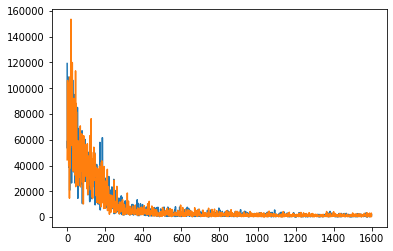

In [14]:

train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    #saved.restore(sess, "/content/final_check_weights.ckpt")
    mini =[]
    for i in range(1600):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/final_18_11.ckpt")
    print('Saved model!')
    
 

In [15]:
val = []

with tf.Session() as sess:
    
    saver = tf.train.Saver()
    saver.restore(sess, '/content/final_18_11.ckpt')
    val.append(sess.run('output',feed_dict={x : x_batch}))
    


INFO:tensorflow:Restoring parameters from /content/final_18_11.ckpt


In [16]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'Final_18_11.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/Final_18_11.pbtxt'

In [0]:
with open('/content/Final_18_11.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  

Restoration Files (No need to run these unless required for additional analysis)

In [0]:
with open('/content/x_test.bin','wb') as file:
  pickle.dump(x_test_t, file)
with open('/content/y_test.bin','wb') as file:
  pickle.dump(y_test_t, file)